# Black Friday Model

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import random

## Get CSV contents of Train and Test Data

In [2]:
trainInputFile = open('/Users/Albert/Documents/Fall 2017/Interactive Data Analysis/Project 1/train.csv', "r")
testInputFile = open('/Users/Albert/Documents/Fall 2017/Interactive Data Analysis/Project 1/test.csv', "r")

In [34]:
trainTemp = []
testTemp = []

trainMissingVals = 0
testMissingVals = 0

## Data Loading

In [4]:
#add each of the 'CSV' file to respective variables
for line in trainInputFile:
	trainTemp.append(line.replace("\n","").split(','))
print("'Train Dataset' Loaded...")

'Train Dataset' Loaded...


In [35]:
for line in testInputFile:
	testTemp.append(line.replace("\n","").split(','))
print("'Test Dataset' Loaded...")

'Test Dataset' Loaded...


## Missing Values

In [6]:
#checking if any element in train file is empty string
for line in trainTemp:
	for element in line:
		if element == "":
			trainMissingVals += 1
print("'Train' has a total of: " + str(trainMissingVals) + " missing values.")

#checking if any element in test file is empty string
for line in testTemp:
	for element in line:
		if element == "":
			testMissingVals += 1
print("'Test' has a total of: " + str(testMissingVals) + " missing values.")

'Train' has a total of: 556885 missing values.
'Test' has a total of: 234906 missing values.


In [36]:
#convert trainTemp and testTemp to Numpy Arrays
train = np.array(trainTemp)
test = np.array(testTemp)

## Unique Values 'User_ID'

In [10]:
#its '-1' because it includes 'User_ID'
print("Number of unique values of First Col Train and Test: " + str(len(list((set(train[:,0])).intersection(set(test[:,0])))) - 1))

Number of unique values of First Col Train and Test: 5891


## Create Pandas Dataframes of Train and Test Data

In [11]:
#get csv from pandas because it creates a dataframe which is nice to access
trainPandas = pd.read_csv('/Users/Albert/Documents/Fall 2017/Interactive Data Analysis/Project 1/train.csv')
testPandas = pd.read_csv('/Users/Albert/Documents/Fall 2017/Interactive Data Analysis/Project 1/test.csv')


In [12]:
testPandas.fillna(0, inplace=True)

## Factorization of 'User_ID' 

In [13]:
#convert User_ID col of Train and Test to category variables
trainPandas['User_ID'] = trainPandas['User_ID'].astype('category')
testPandas['User_ID'] = testPandas['User_ID'].astype('category')

## Unique Values 'Product_ID' 

In [14]:
#how many different product lines are there in the training dataset?
UniqueProductsTrain = len(trainPandas['Product_ID'].unique())
print("Amount of different products in 'Train':" + str(UniqueProductsTrain))

Amount of different products in 'Train':3631


## Product_ID Statistics 

In [15]:
print("---Summary of Product_ID---")
print(trainPandas['Product_ID'].value_counts().describe())

---Summary of Product_ID---
count    3631.000000
mean      151.492151
std       212.852932
min         1.000000
25%        19.500000
50%        71.000000
75%       194.000000
max      1880.000000
Name: Product_ID, dtype: float64


## Plot with Respect to 'Gender' 

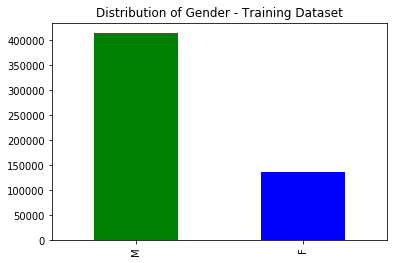

In [17]:
###PLOT 1###
#plot distribution of gender with bar graph
trainPandas['Gender'].value_counts().plot(kind='bar',color=['g','b'])
plt.title("Distribution of Gender - Training Dataset")
plt.show()

## Plot with Respect to 'Age' vs 'Gender'

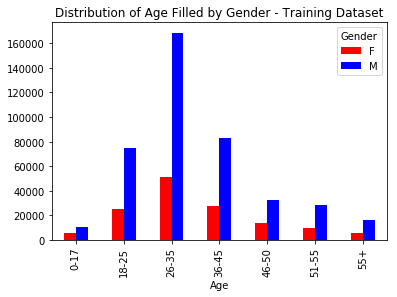

In [18]:
###PLOT 2###
#plot Age and Gender from Train with bar graph
PlotAgeGenderTrain = pd.crosstab(index=trainPandas['Age'], columns=trainPandas['Gender'])
PlotAgeGenderTrain.plot(kind="bar",color=['r','b'])
plt.title("Distribution of Age Filled by Gender - Training Dataset")
plt.show()

In [19]:
#convert Occupation col of Train and Test to category variables
trainPandas['Occupation'] = trainPandas['Occupation'].astype('category')
testPandas['Occupation'] = testPandas['Occupation'].astype('category')

## Unique Values 'Occupations'

In [20]:
#how many different types of Occupations are there?
UniqueOccupationTrain = len(trainPandas['Occupation'].unique())
print("Amount of different occupations in 'Train': " + str(UniqueOccupationTrain))

Amount of different occupations in 'Train': 21


##  Plot with Respect to 'Occupation' vs 'Age'

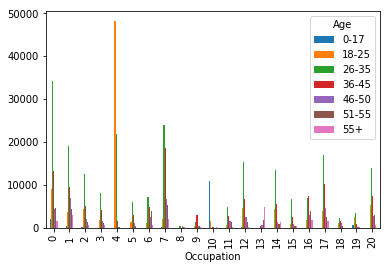

In [21]:
###PLOT 3###
#graph occupation and age and see if they have any correlations
OccupationAgeTrain = pd.crosstab(index=trainPandas['Occupation'], columns=trainPandas['Age'])
OccupationAgeTrain.plot(kind='bar')
plt.show()

## Plot with Respect to 'Occupation' vs 'Gender' 

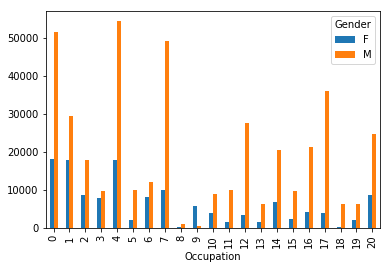

In [39]:
###PLOT 4###
#graph occupation and gender and see if they have correlations
OccupationGenderTrain = pd.crosstab(index=trainPandas['Occupation'], columns=trainPandas['Gender'])
OccupationGenderTrain.plot(kind='bar')
plt.show()

## Plot of 'Gender' vs 'Occupation' vs 'Age' 

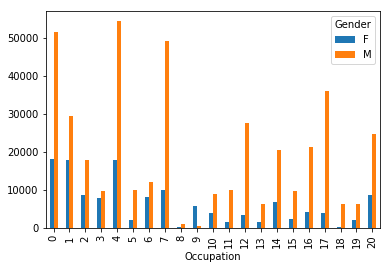

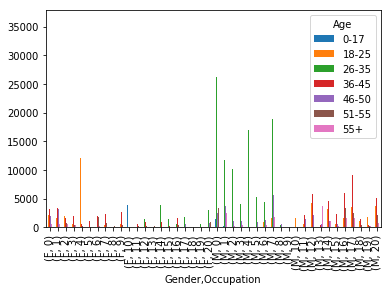

In [38]:
###PLOT 5###
GenderOccupationAge = pd.crosstab(index=[trainPandas['Gender'],trainPandas['Occupation']], columns=trainPandas['Age'])
GenderOccupationAge.plot(kind='bar')
plt.show()

## Unique Values 'Cities' 

In [26]:
#See what types of different city ategories there are
UniqueCitiesCategory = trainPandas['City_Category'].unique()
print("Types of different city categories in 'Train': " + str(UniqueCitiesCategory))

Types of different city categories in 'Train': ['A' 'C' 'B']


## Plot of 'Age' vs 'City'

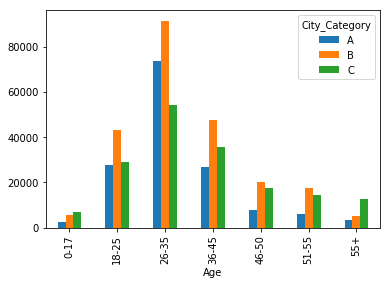

In [27]:
###PLOT 6###
CityAgeTrain = pd.crosstab(index=trainPandas['Age'], columns=trainPandas['City_Category'])
#CityAgeTrain.plot(kind='box')
CityAgeTrain.plot(kind='bar')
plt.show()

## Plot of 'Stay in City' vs 'City' 

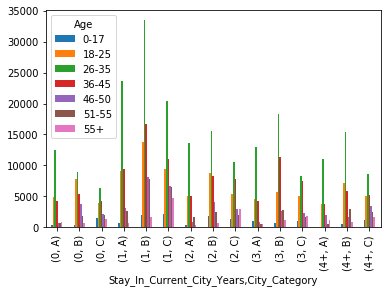

In [28]:
###PLOT 7###
SICAgeCityCategory = pd.crosstab(index=[trainPandas['Stay_In_Current_City_Years'],trainPandas['City_Category']], columns=trainPandas['Age'])
SICAgeCityCategory.plot(kind='bar')
plt.show()

In [29]:
#convert marital col of Train and Test to category variables
trainPandas['Marital_Status'] = trainPandas['Marital_Status'].astype('category')
testPandas['Marital_Status'] = testPandas['Marital_Status'].astype('category')

## Plot of 'Marital_Status' vs 'Gender' 

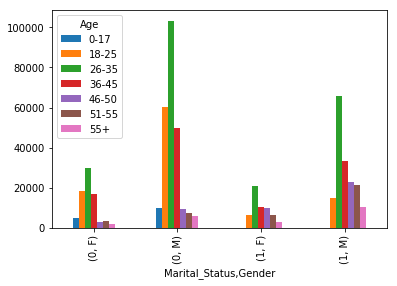

In [30]:
###PLOT 8###
#looking at ages 0-17 none of the people in that group have a status of 1 so 0 is unmarried and married is 1
MaritalAgeGender = pd.crosstab(index=[trainPandas['Marital_Status'],trainPandas['Gender']], columns=trainPandas['Age'])
MaritalAgeGender.plot(kind='bar')
plt.show()

In [32]:
#set product categories as factors/categories
trainPandas['Product_Category_1'] = trainPandas['Product_Category_1'].astype('category')
testPandas['Product_Category_1'] = testPandas['Product_Category_1'].astype('category')
trainPandas['Product_Category_2'] = trainPandas['Product_Category_2'].astype('category')
testPandas['Product_Category_2'] = testPandas['Product_Category_2'].astype('category')
trainPandas['Product_Category_3'] = trainPandas['Product_Category_3'].astype('category')
testPandas['Product_Category_3'] = testPandas['Product_Category_3'].astype('category')

trainPandas['Stay_In_Current_City_Years'] = trainPandas['Stay_In_Current_City_Years'].astype('category')
testPandas['Stay_In_Current_City_Years'] = testPandas['Stay_In_Current_City_Years'].astype('category')
trainDataTemp1 = trainPandas[['Occupation', 'Marital_Status', 'Product_Category_1']].copy()

## Linear Regression Model 

In [33]:
#Model Implementation

#Train on - Gender, Age, Occupation, City Category, Stay in current city, Marital status, Product categories
from sklearn import linear_model
from sklearn import preprocessing
#set seed
random.seed(1968)
#Create Dummy variables for categorical columns in dataframe
dummies = pd.get_dummies(trainPandas['City_Category'])
dummies1 = pd.get_dummies(trainPandas['Stay_In_Current_City_Years'])
dummies2 = pd.get_dummies(trainPandas['Age'])
dummies3 = pd.get_dummies(trainPandas['Gender'])

tdata = pd.concat([trainDataTemp1,dummies],axis=1)
tdata = pd.concat([tdata,dummies1],axis=1)
tdata = pd.concat([tdata,dummies2],axis=1)
tdata = pd.concat([tdata,dummies3],axis=1)
target1 = trainPandas[['Purchase']].copy()

#Linear Model
lm = linear_model.LinearRegression()
model = lm.fit(tdata,target1)
pred = lm.predict(tdata)
score = lm.score(tdata,target1) # the r^2 of the value

print("Score of Model: " + str(score))

/Users/Albert/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Score of Model: 0.125001770185
